## Second Assignment
### Group Project
#### NAME : KAKANDE Paul REG. NO. : 2022/HD07/2044U
#### NAME : Kevin Cissy NABUKEERA REG. NO. : 2022/HD07/2047U

In [1]:
# Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
from sklearn.decomposition import PCA

%matplotlib inline

#### Loading the dataset

In [2]:
# Reading the dataset into a DataFrame
data = pd.read_csv("dataset.csv")

#### Making a copy of the original dataset

In [3]:
orig_data = data.copy()

### Exploratory Data Analysis

In here, we look at the general distribution of the dataset, the correlation between variables to gain insights into the data.

Steps taken:
- **Data Description** - This includes checking the shape of the data, number of null values, data types, descriptive statistics among others.
- **Univariate Analysis** - This involves review of individual variables.
- **Bivariate Analysis** - This involves review of two variables at a time. It may include determining the correlation between them.
- **Multivariate Analysis** - This involves review of three or more variables at a time.

#### Data Description

Checking the dimensions of the data to identify the number of records and variables

In [4]:
# Displaying the dimensions of the data
data.shape

(10000, 61)

The dataset has 10,000 records and 61 columns.

Checking the data of the nature of the data by displaying the first five records.

In [5]:
# Displaying the first 5 rows of the data
data.head()

PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  \
0      33216   72  Female             Others     Others     112     156  46.0   
1      89319   45  Female             Others  Caucasian      40     190  11.1   
2      48170   44    Male         Homosexual    African     112     209  25.6   
3      83430   40    Male       Heterosexual   Hispanic      83     195  21.8   
4      67143   81    Male            Asexual    African      83     144  40.0   

   Label  Fever  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      1      0  ...          1                  1           0            0   
1      1      1  ...          1                  0           0            1   
2      0      0  ...          1                  1           0            0   
3      1      0  ...          0                  1           1            1   
4      0      1  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  
4                    1  Covid-19  

[5 rows x 61 columns]

In [6]:
# Displaying the columns of the data
data.columns

Index(['PatientID', 'Age', 'Gender', 'Sexual_Orientation', 'Race', 'Weight',
       'Height', 'BMI', 'Label', 'Fever', 'Cough', 'Fatigue', 'BodyAche',
       'LossOfTaste', 'Sweating', 'Headache', 'Nausea', 'Diarrhea',
       'LossOfAppetite', 'ShortnessOfBreath', 'ChestPain', 'FrequentUrination',
       'ExcessiveThirst', 'WeightLoss', 'BlurredVision', 'Chills',
       'SoreThroat', 'Confusion', 'Dizziness', 'Rash', 'JointPain',
       'StiffNeck', 'Seizures', 'SensitivityToLight', 'MoodSwings', 'NeckPain',
       'MuscleWeakness', 'LossOfSmell', 'Insomnia', 'HearingLoss', 'EarAche',
       'NightSweats', 'SkinRash', 'Wheezing', 'YellowSkin', 'PinkEye',
       'EyePain', 'IncreasedAppetite', 'DecreasedAppetite', 'NasalCongestion',
       'RunnyNose', 'SinusPain', 'SwollenLymphNodes', 'MemoryLoss',
       'Dehydration', 'IncreasedUrination', 'DryMouth',
       'TinglingInHandsOrFeet', 'RedEye', 'LossOfConsciousness', 'Disease'],
      dtype='object')

Using `.info()` method to identify the columns with missing values and their datatypes.

In [7]:
# Checking the datatypes and null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientID              10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Sexual_Orientation     10000 non-null  object 
 4   Race                   10000 non-null  object 
 5   Weight                 10000 non-null  int64  
 6   Height                 10000 non-null  int64  
 7   BMI                    10000 non-null  float64
 8   Label                  10000 non-null  int64  
 9   Fever                  10000 non-null  int64  
 10  Cough                  10000 non-null  int64  
 11  Fatigue                10000 non-null  int64  
 12  BodyAche               10000 non-null  int64  
 13  LossOfTaste            10000 non-null  int64  
 14  Sweating               10000 non-null  int64  
 15  Hea

Checking the distribution of the data using panda's `describe` method.

In [8]:
# Displaying the descriptive statistics of the data
data.describe().T

count         mean           std    min      25%  \
PatientID              10000.0  49903.77160  28948.676218    5.0  24647.5   
Age                    10000.0     57.86830     24.669317   15.0     37.0   
Weight                 10000.0     79.70340     23.349817   40.0     59.0   
Height                 10000.0    174.87370     20.335228  140.0    157.0   
BMI                    10000.0     27.16025     10.374548    9.1     19.2   
Label                  10000.0      0.49970      0.500025    0.0      0.0   
Fever                  10000.0      0.50310      0.500015    0.0      0.0   
Cough                  10000.0      0.49850      0.500023    0.0      0.0   
Fatigue                10000.0      0.49220      0.499964    0.0      0.0   
BodyAche               10000.0      0.48950      0.499915    0.0      0.0   
LossOfTaste            10000.0      0.49840      0.500022    0.0      0.0   
Sweating               10000.0      0.49840      0.500022    0.0      0.0   
Headache               10000.0      0.49320      0.499979    0.0      0.0   
Nausea                 10000.0      0.51210      0.499879    0.0      0.0   
Diarrhea               10000.0      0.49290      0.499975    0.0      0.0   
LossOfAppetite         10000.0      0.50410      0.500008    0.0      0.0   
ShortnessOfBreath      10000.0      0.49900      0.500024    0.0      0.0   
ChestPain              10000.0      0.49350      0.499983    0.0      0.0   
FrequentUrination      10000.0      0.50860      0.499951    0.0      0.0   
ExcessiveThirst        10000.0      0.49480      0.499998    0.0      0.0   
WeightLoss             10000.0      0.49510      0.500001    0.0      0.0   
BlurredVision          10000.0      0.50240      0.500019    0.0      0.0   
Chills                 10000.0      0.49860      0.500023    0.0      0.0   
SoreThroat             10000.0      0.49240      0.499967    0.0      0.0   
Confusion              10000.0      0.49890      0.500024    0.0      0.0   
Dizziness              10000.0      0.49790      0.500021    0.0      0.0   
Rash                   10000.0      0.49830      0.500022    0.0      0.0   
JointPain              10000.0      0.50180      0.500022    0.0      0.0   
StiffNeck              10000.0      0.50410      0.500008    0.0      0.0   
Seizures               10000.0      0.50870      0.499949    0.0      0.0   
SensitivityToLight     10000.0      0.50400      0.500009    0.0      0.0   
MoodSwings             10000.0      0.50410      0.500008    0.0      0.0   
NeckPain               10000.0      0.49480      0.499998    0.0      0.0   
MuscleWeakness         10000.0      0.50270      0.500018    0.0      0.0   
LossOfSmell            10000.0      0.49790      0.500021    0.0      0.0   
Insomnia               10000.0      0.50600      0.499989    0.0      0.0   
HearingLoss            10000.0      0.50050      0.500025    0.0      0.0   
EarAche                10000.0      0.49880      0.500024    0.0      0.0   
NightSweats            10000.0      0.51030      0.499919    0.0      0.0   
SkinRash               10000.0      0.50120      0.500024    0.0      0.0   
Wheezing               10000.0      0.49760      0.500019    0.0      0.0   
YellowSkin             10000.0      0.50530      0.499997    0.0      0.0   
PinkEye                10000.0      0.50430      0.500007    0.0      0.0   
EyePain                10000.0      0.50450      0.500005    0.0      0.0   
IncreasedAppetite      10000.0      0.49490      0.499999    0.0      0.0   
DecreasedAppetite      10000.0      0.50490      0.500001    0.0      0.0   
NasalCongestion        10000.0      0.49550      0.500005    0.0      0.0   
RunnyNose              10000.0      0.50370      0.500011    0.0      0.0   
SinusPain              10000.0      0.50220      0.500020    0.0      0.0   
SwollenLymphNodes      10000.0      0.49630      0.500011    0.0      0.0   
MemoryLoss             10000.0      0.50430      0.500007    0.0      0.0   
Dehydration          

Checking for duplicated records.

In [9]:
# Checking the duplicated records in the data
data[data.duplicated()]

Empty DataFrame
Columns: [PatientID, Age, Gender, Sexual_Orientation, Race, Weight, Height, BMI, Label, Fever, Cough, Fatigue, BodyAche, LossOfTaste, Sweating, Headache, Nausea, Diarrhea, LossOfAppetite, ShortnessOfBreath, ChestPain, FrequentUrination, ExcessiveThirst, WeightLoss, BlurredVision, Chills, SoreThroat, Confusion, Dizziness, Rash, JointPain, StiffNeck, Seizures, SensitivityToLight, MoodSwings, NeckPain, MuscleWeakness, LossOfSmell, Insomnia, HearingLoss, EarAche, NightSweats, SkinRash, Wheezing, YellowSkin, PinkEye, EyePain, IncreasedAppetite, DecreasedAppetite, NasalCongestion, RunnyNose, SinusPain, SwollenLymphNodes, MemoryLoss, Dehydration, IncreasedUrination, DryMouth, TinglingInHandsOrFeet, RedEye, LossOfConsciousness, Disease]
Index: []

[0 rows x 61 columns]

Checking for duplicated `PatientIDs`

In [10]:
# Checking the number of unique elements in the PatientID column
data.PatientID.nunique()

10000

#### Description Notes
- At hand is a dataset with 10000 records of 61 variables.
- There are no null values in any record.
- There are no duplicated records, neither are there duplicated `PatientID`s.

### Univariate Analysis

Here, individual variables were explored to determine their distribution.

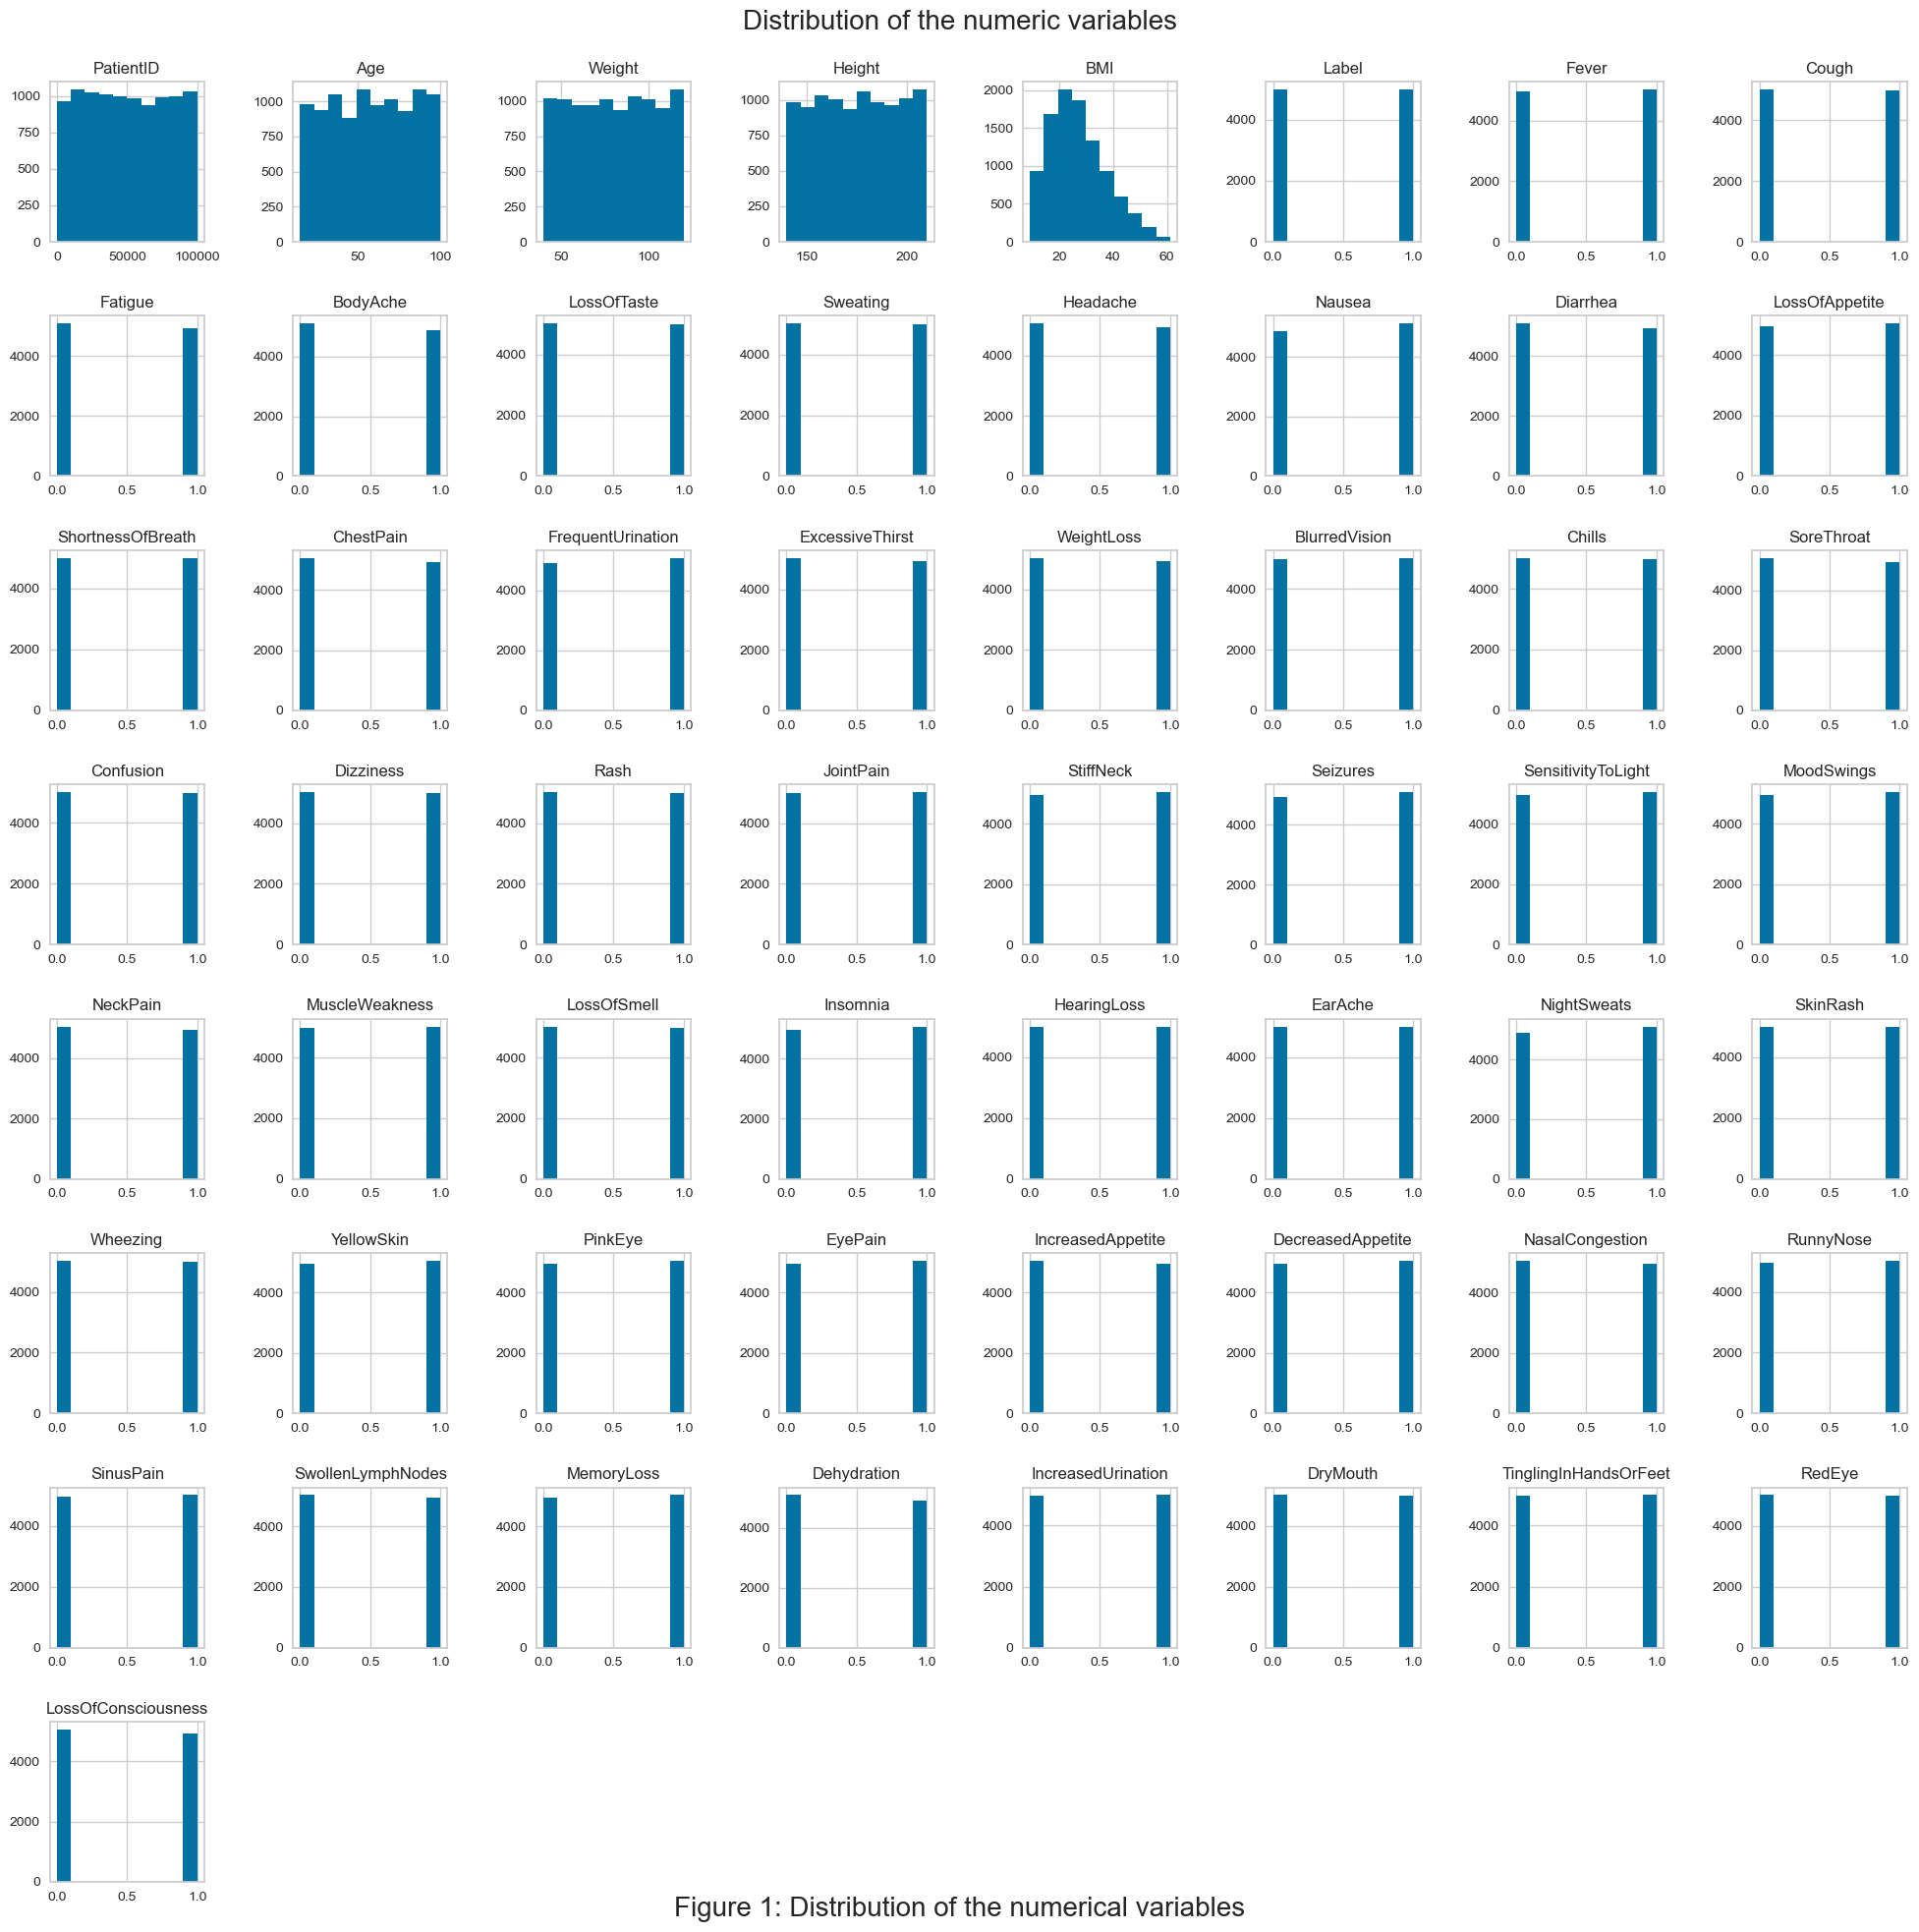

In [11]:
# plotting the data distribution
data.hist(figsize = (20,20));
plt.suptitle("Distribution of the numeric variables", fontsize = 20) # Adds title to plot

# Adding figure caption
txt="Figure 1: Distribution of the numerical variables"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)

# Setting the padding of the figure
plt.tight_layout(pad = 2.0)

With the exception of **PatientID, Age, Weight, Height and BMI**, all other numerical variables are binary with values **0** and **1** as shown in Figure 1.

Checking the value counts of the target variable `Label`.

In [12]:
# Displaying the counts of the target values
data.Label.value_counts()

0    5003
1    4997
Name: Label, dtype: int64

Converting the `Label's` value counts to a dataframe for plotting

In [13]:
# Creating a dataframe of the target value counts
pie_data = pd.DataFrame(data.Label.value_counts())
pie_data

Label
0   5003
1   4997

Plotting the distribution of the target categories

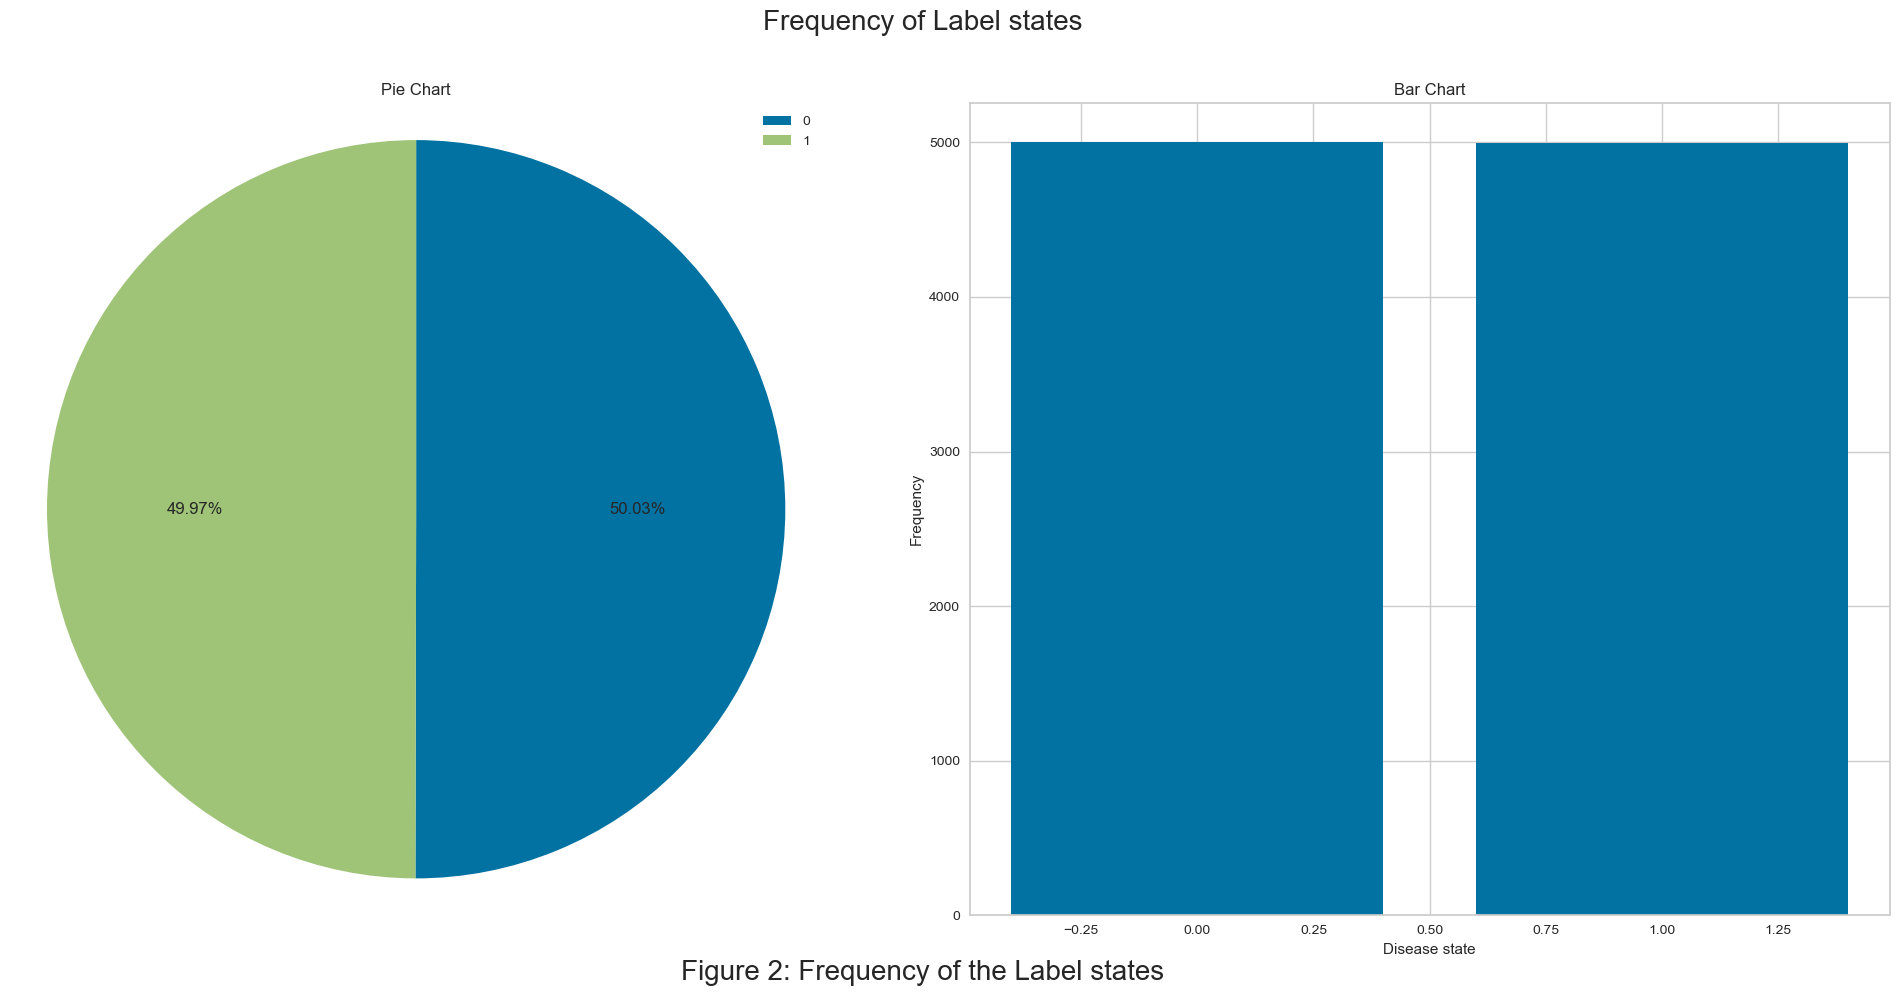

In [14]:
# Plotting the frequencies of the Disease column values
plt.figure(figsize = (20,10))
plt.subplot(121)
pie = plt.pie(pie_data.Label, startangle = 90, counterclock = False, autopct='%1.2f%%')
plt.legend(pie_data.index)
plt.title("Pie Chart")
plt.axis("square")

plt.subplot(122)
bar = plt.bar(pie_data.index, pie_data.Label.values)
plt.ylabel("Frequency")
plt.xlabel("Disease state")
plt.title("Bar Chart")

plt.suptitle("Frequency of Label states", fontsize = 20)
# Adding figure caption
txt="Figure 2: Frequency of the Label states"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)

# Setting the padding of the figure
plt.tight_layout(pad = 2.0)

As shown in Figure 2, the disease states that is **Disease** column's values have an almost equal distribution.

#### Bivariate Analysis
As our target column, `Disease`, is categorical, we use `Analysis of variance` and `chi-square test` to find out its corelation with the `numeric` and `categorical` variables respectively.

In [15]:
data.columns

Index(['PatientID', 'Age', 'Gender', 'Sexual_Orientation', 'Race', 'Weight',
       'Height', 'BMI', 'Label', 'Fever', 'Cough', 'Fatigue', 'BodyAche',
       'LossOfTaste', 'Sweating', 'Headache', 'Nausea', 'Diarrhea',
       'LossOfAppetite', 'ShortnessOfBreath', 'ChestPain', 'FrequentUrination',
       'ExcessiveThirst', 'WeightLoss', 'BlurredVision', 'Chills',
       'SoreThroat', 'Confusion', 'Dizziness', 'Rash', 'JointPain',
       'StiffNeck', 'Seizures', 'SensitivityToLight', 'MoodSwings', 'NeckPain',
       'MuscleWeakness', 'LossOfSmell', 'Insomnia', 'HearingLoss', 'EarAche',
       'NightSweats', 'SkinRash', 'Wheezing', 'YellowSkin', 'PinkEye',
       'EyePain', 'IncreasedAppetite', 'DecreasedAppetite', 'NasalCongestion',
       'RunnyNose', 'SinusPain', 'SwollenLymphNodes', 'MemoryLoss',
       'Dehydration', 'IncreasedUrination', 'DryMouth',
       'TinglingInHandsOrFeet', 'RedEye', 'LossOfConsciousness', 'Disease'],
      dtype='object')

Separating the continuous and categorical variables in lists for proper evaluation of correlation with the target.

In [16]:
# Separating the continous and categorical variables in different lists
numeric_variables = ['Weight','Height', 'BMI',]

categorical_variables = ['Age', 'Gender', 'Sexual_Orientation', 'Race', 'Fever', 'Cough', 'Fatigue', 'BodyAche',
       'LossOfTaste', 'Sweating', 'Headache', 'Nausea', 'Diarrhea',
       'LossOfAppetite', 'ShortnessOfBreath', 'ChestPain', 'FrequentUrination',
       'ExcessiveThirst', 'WeightLoss', 'BlurredVision', 'Chills',
       'SoreThroat', 'Confusion', 'Dizziness', 'Rash', 'JointPain',
       'StiffNeck', 'Seizures', 'SensitivityToLight', 'MoodSwings', 'NeckPain',
       'MuscleWeakness', 'LossOfSmell', 'Insomnia', 'HearingLoss', 'EarAche',
       'NightSweats', 'SkinRash', 'Wheezing', 'YellowSkin', 'PinkEye',
       'EyePain', 'IncreasedAppetite', 'DecreasedAppetite', 'NasalCongestion',
       'RunnyNose', 'SinusPain', 'SwollenLymphNodes', 'MemoryLoss',
       'Dehydration', 'IncreasedUrination', 'DryMouth',
       'TinglingInHandsOrFeet', 'RedEye', 'LossOfConsciousness', 'Disease']

target = 'Label'

#### Correlation between target and continuous variables

In [17]:
# f_oneway() function takes the group data as input and returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between numeric variable and the target
# Assumption(H0) is that target and numeric variable are NOT correlated
 
# Finds out the numeric variable data for each Disease as a list
for num in numeric_variables:
    print(num)
    CategoryGroupLists = data.groupby(target)[num].apply(list)
    
    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value & greater than 0.05
    anovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', anovaResults[1])
    print("\n")

Weight
P-Value for Anova is:  0.3331724733687177


Height
P-Value for Anova is:  0.8316837011406879


BMI
P-Value for Anova is:  0.596613130939416




Based on the results above, none of the numeric variable is statistically correlated significantly to the target variable as all have p-values of greater that 0.05.

#### Correlation between target and categorical variables
Here, we use the `chi-square test`.

The Chi-square test finds the probability of a Null hypothesis(H0).
- Assumption(H0): The two columns are NOT related to each other
- Result of Chi-Sq Test: The Probability of H0 being True

In [18]:
# importing the required function
from scipy.stats import chi2_contingency

result_dict = {}

# Performing Chi-sq test
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)

for category in categorical_variables:
    crosstabResult = pd.crosstab(index = data[target],columns = data[category])
    chiSqResult = chi2_contingency(crosstabResult)
    result_dict[category] = chiSqResult[1]

result_list = [result_dict]
result_df = pd.DataFrame.from_records(result_list, index = ['p_value'])
result_df.T

p_value
Age                    0.992026
Gender                 0.689050
Sexual_Orientation     0.852370
Race                   0.158543
Fever                  0.535495
Cough                  0.616947
Fatigue                0.905213
BodyAche               0.123785
LossOfTaste            0.246124
Sweating               1.000000
Headache               0.689730
Nausea                 0.088765
Diarrhea               0.673832
LossOfAppetite         0.733477
ShortnessOfBreath      0.423779
ChestPain              0.644928
FrequentUrination      0.337503
ExcessiveThirst        0.071747
WeightLoss             0.889119
BlurredVision          0.078355
Chills                 0.078378
SoreThroat             0.780153
Confusion              0.535170
Dizziness              0.081812
Rash                   0.089091
JointPain              0.317412
StiffNeck              0.857534
Seizures               0.288597
SensitivityToLight     0.054911
MoodSwings             0.794477
NeckPain               0.471117
MuscleWeakness         0.459490
LossOfSmell            0.951954
Insomnia               0.379215
HearingLoss            0.888707
EarAche                0.378936
NightSweats            0.951161
SkinRash               0.423626
Wheezing               0.298468
YellowSkin             0.062781
PinkEye                0.167730
EyePain                0.368388
IncreasedAppetite      0.857626
DecreasedAppetite      0.412529
NasalCongestion        0.039339
RunnyNose              0.327292
SinusPain              0.688959
SwollenLymphNodes      0.826212
MemoryLoss             0.435070
Dehydration            0.749781
IncreasedUrination     0.459263
DryMouth               0.936084
TinglingInHandsOrFeet  0.423738
RedEye                 0.435454
LossOfConsciousness    0.105035
Disease                0.446029

In [19]:
# Finding the categorical variables that correlate with the target
result_df.T[result_df.T['p_value'] <= 0.05]

p_value
NasalCongestion  0.039339

Based on the `Chi-Square test p_values`, only one categorical variable that is `NasalCongestion` is correlated to a statistical significance with the target `Label`.

This is then plotted against with separation of its classes by target classes.

Text(0.5, 0.01, 'Figure 3: Categorical plot of NasalCongestion status separated by Label categories')

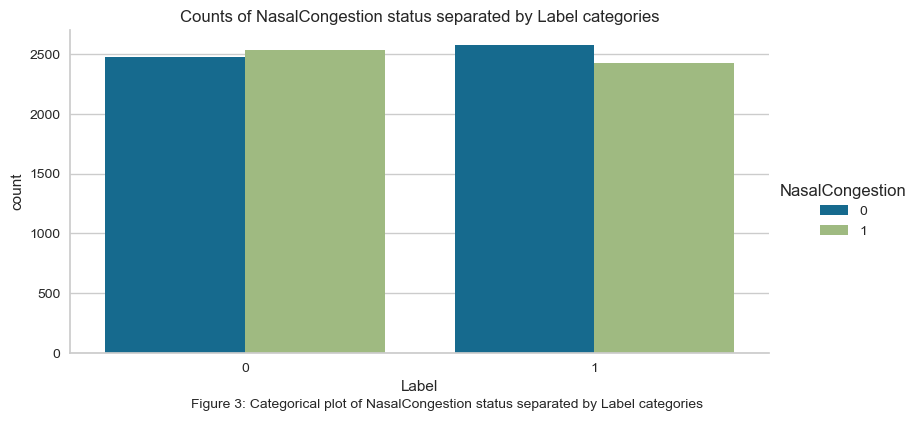

In [20]:
sns.catplot(data=data, kind='count', x='Label', height=4, aspect=2, hue = "NasalCongestion")
plt.title("Counts of NasalCongestion status separated by Label categories")

# Adding figure caption
txt="Figure 3: Categorical plot of NasalCongestion status separated by Label categories"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)

#### Creating a Pandas profiling report

In [21]:
from ydata_profiling import ProfileReport

In [22]:
profile = ProfileReport(data, title="Report", explorative = True)

In [23]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Exploratory Data Analysis Summary

##### Description Notes
- At hand is a dataset with 10000 records of 61 variables.
- There are no null values in any record.
- There are no duplicated records, neither are there duplicated `PatientID`s.

##### Univariate Analysis
- With the exception of the `Age`, `Weight`, `Height` and `BMI` which were continous variables, the rest of the variables were categorical.
- The target variable `Label` classes were relatively balanced throughout the dataset.

##### Bivariate Analysis
- Only `NightSweats` was statistically significantly correlated at 95% confidence to the target `Label`.

### Data Wrangling

In this section, the data is formated in a way that may aid in its proper analysis. More Exploratory Data Analysis is performed to assess the contribution of the wrangling to the understanding of the dataset.

Converting the categorical variables to category datatype.

In [24]:
# Converting the categorical variables' data types to category.
#cols = ['Age', 'Gender', 'Sexual_Orientation', 'Race', 'Label', 'Fever', 'Cough', 'Fatigue', 'BodyAche',
#       'LossOfTaste', 'Sweating', 'Headache', 'Nausea', 'Diarrhea',
#       'LossOfAppetite', 'ShortnessOfBreath', 'ChestPain', 'FrequentUrination',
#       'ExcessiveThirst', 'WeightLoss', 'BlurredVision', 'Chills',
#       'SoreThroat', 'Confusion', 'Dizziness', 'Rash', 'JointPain',
#       'StiffNeck', 'Seizures', 'SensitivityToLight', 'MoodSwings', 'NeckPain',
#       'MuscleWeakness', 'LossOfSmell', 'Insomnia', 'HearingLoss', 'EarAche',
#       'NightSweats', 'SkinRash', 'Wheezing', 'YellowSkin', 'PinkEye',
#       'EyePain', 'IncreasedAppetite', 'DecreasedAppetite', 'NasalCongestion',
#       'RunnyNose', 'SinusPain', 'SwollenLymphNodes', 'MemoryLoss',
#       'Dehydration', 'IncreasedUrination', 'DryMouth',
#       'TinglingInHandsOrFeet', 'RedEye', 'LossOfConsciousness', 'Disease']
#data[cols] = data[cols].astype('category')

Binning the `BMI` to known classes of `Underweight`, `Healthy Weight`, `Overweight` and `Obese` making it categorical.

In [25]:
# binning the BMI
bins = [-np.inf, 18.4, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese']
data['BMI'] = pd.cut(x = data['BMI'], bins = bins, labels = labels, include_lowest = True)

In [26]:
data.head()

PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height  \
0      33216   72  Female             Others     Others     112     156   
1      89319   45  Female             Others  Caucasian      40     190   
2      48170   44    Male         Homosexual    African     112     209   
3      83430   40    Male       Heterosexual   Hispanic      83     195   
4      67143   81    Male            Asexual    African      83     144   

              BMI  Label  Fever  ...  SinusPain  SwollenLymphNodes  \
0           Obese      1      0  ...          1                  1   
1     Underweight      1      1  ...          1                  0   
2      Overweight      0      0  ...          1                  1   
3  Healthy Weight      1      0  ...          0                  1   
4           Obese      0      1  ...          0                  1   

   MemoryLoss  Dehydration  IncreasedUrination  DryMouth  \
0           0            0                   1         1   
1           0            1                   0         1   
2           0            0                   1         1   
3           1            1                   0         1   
4           1            0                   0         0   

   TinglingInHandsOrFeet  RedEye  LossOfConsciousness   Disease  
0                      1       0                    1   Healthy  
1                      1       1                    1  Covid-19  
2                      1       0                    0   Malaria  
3                      0       1                    0  Diabetes  
4                      0       0                    1  Covid-19  

[5 rows x 61 columns]

Re-checking if the binned BMI is could be correlated to the target

In [27]:
# Performing chi-square test for binned BMI
crosstabResult = pd.crosstab(index = data['Label'],columns = data['BMI'])
chiSqResult = chi2_contingency(crosstabResult)
chiSqResult[1]

0.646573561463283

Making categories of symptoms by disease. Source https://cdc.gov

In [28]:
covid_symptoms = [ 'Fever', 'Cough', 'Fatigue', 'BodyAche',
                  'LossOfTaste', 'Headache', 'Nausea','Diarrhea',
                  'ShortnessOfBreath', 'ChestPain','Chills',
                  'SoreThroat', 'LossOfSmell','Wheezing', 
                  'NasalCongestion']

malaria_symptoms = ['Fever', 'Fatigue', 'BodyAche', 'Headache', 
                    'Nausea', 'Diarrhea', 'Chills','Confusion',
                    'Dizziness', 'JointPain','StiffNeck', 'Seizures', 
                    'MuscleWeakness', 'YellowSkin', 'PinkEye',
                    'LossOfConsciousness']

diabetes_symptoms = ['Fatigue','FrequentUrination','ExcessiveThirst', 
                     'WeightLoss', 'BlurredVision','MuscleWeakness', 
                     'IncreasedAppetite', 'DecreasedAppetite',
                     'IncreasedUrination', 'DryMouth','TinglingInHandsOrFeet']

hiv_symptoms = ['Fever', 'Fatigue', 'BodyAche', 'Chills',
                'SoreThroat','NightSweats', 'SkinRash', 
                'SwollenLymphNodes', 'DryMouth']


Making aggregate columns for symptoms.

In [29]:
data['covid_symptoms'] = data[covid_symptoms].sum(axis = 1)
data['malaria_symptoms'] = data[malaria_symptoms].sum(axis = 1)
data['diabetes_symptoms'] = data[diabetes_symptoms].sum(axis = 1)
data['hiv_symptoms'] = data[hiv_symptoms].sum(axis = 1)

Plotting the distribution of the aggregated disease symptoms.

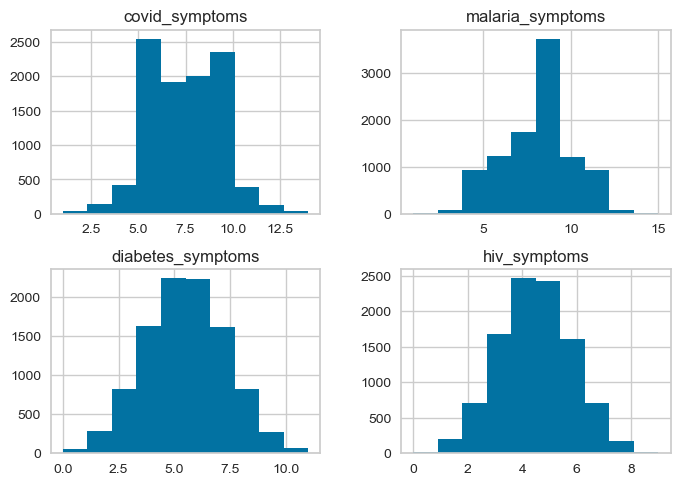

In [30]:
data[['covid_symptoms','malaria_symptoms','diabetes_symptoms','hiv_symptoms']].hist();

Checking the correlation of the aggregated symptoms with the Label.

In [31]:
symptoms = ['covid_symptoms','malaria_symptoms','diabetes_symptoms','hiv_symptoms']
for num in symptoms:
    print(num)
    CategoryGroupLists = data.groupby(target)[num].apply(list)
    
    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value & greater than 0.05
    anovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', anovaResults[1])
    print("\n")

covid_symptoms
P-Value for Anova is:  0.7617654873368698


malaria_symptoms
P-Value for Anova is:  0.3823486269643577


diabetes_symptoms
P-Value for Anova is:  0.4938922602639124


hiv_symptoms
P-Value for Anova is:  0.8377063423529054




It was observed that none of the aggregated disease symptoms had no significant correlation with the target 'Label'

Creating an aggregated column as a sum of all the aggregated symptoms.

In [32]:
data['total_symptoms'] = data[['covid_symptoms','malaria_symptoms','diabetes_symptoms','hiv_symptoms']].sum(axis = 1)

Checking the distribution of the `total_symptoms` column.

<AxesSubplot:>

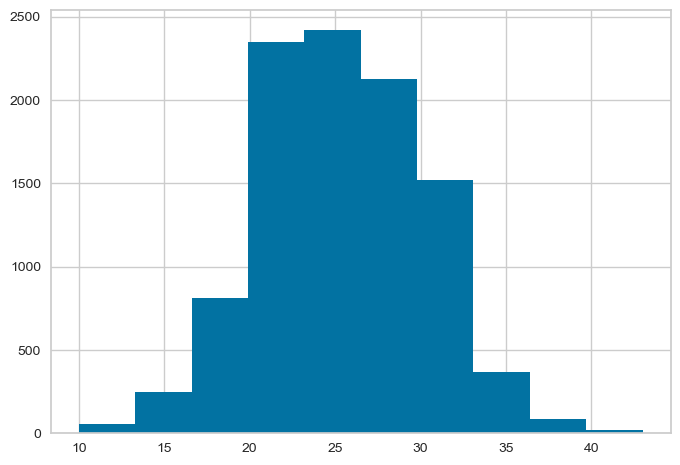

In [33]:
data.total_symptoms.hist()

Checking the correlation of the `total_symptoms` with the target `Label`.

In [34]:
symptoms = ['total_symptoms']
for num in symptoms:
    print(num)
    CategoryGroupLists = data.groupby(target)[num].apply(list)
    
    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value & greater than 0.05
    anovaResults = f_oneway(*CategoryGroupLists)
    print('P-Value for Anova is: ', anovaResults[1])
    print("\n")

total_symptoms
P-Value for Anova is:  0.6808655853763805




It was observed that the `total_symptoms` data did not have significant correlation to the target `Label`.

### Model Spot-Checking

In [35]:
s = ClassificationExperiment()
s.setup(orig_data, target = 'Label', session_id = 123, normalize = True, feature_selection = True)

In [36]:
best = s.compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [37]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Doing model spot checking on the original data

In [38]:
# init setup for pycaret classification
s = setup(orig_data, target = 'Label', session_id = 123)

In [39]:
# init the class ClassificationExperiment
exp = ClassificationExperiment()

In [40]:
# init setup on exp
exp.setup(orig_data, target = 'Label', session_id = 123)

In [41]:
# compare baseline models
best = compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

### Doing model spot checking on the original data with dummies

Creating encodings for the categorical data in the original dataset using pandas get_dummies

In [42]:
data_dummies = pd.get_dummies(orig_data)

In [43]:
# Separating the target from the other variables
X , y = data_dummies.drop(['Label','PatientID'], axis = 1), data_dummies['Label']

In [44]:
data_dummies.columns

Index(['PatientID', 'Age', 'Weight', 'Height', 'BMI', 'Label', 'Fever',
       'Cough', 'Fatigue', 'BodyAche', 'LossOfTaste', 'Sweating', 'Headache',
       'Nausea', 'Diarrhea', 'LossOfAppetite', 'ShortnessOfBreath',
       'ChestPain', 'FrequentUrination', 'ExcessiveThirst', 'WeightLoss',
       'BlurredVision', 'Chills', 'SoreThroat', 'Confusion', 'Dizziness',
       'Rash', 'JointPain', 'StiffNeck', 'Seizures', 'SensitivityToLight',
       'MoodSwings', 'NeckPain', 'MuscleWeakness', 'LossOfSmell', 'Insomnia',
       'HearingLoss', 'EarAche', 'NightSweats', 'SkinRash', 'Wheezing',
       'YellowSkin', 'PinkEye', 'EyePain', 'IncreasedAppetite',
       'DecreasedAppetite', 'NasalCongestion', 'RunnyNose', 'SinusPain',
       'SwollenLymphNodes', 'MemoryLoss', 'Dehydration', 'IncreasedUrination',
       'DryMouth', 'TinglingInHandsOrFeet', 'RedEye', 'LossOfConsciousness',
       'Gender_Female', 'Gender_Male', 'Sexual_Orientation_Asexual',
       'Sexual_Orientation_Bisexual', 'Sexual_O

In [45]:
# Initiating the class experiment for model spot checking.
s = ClassificationExperiment()
s.setup(X, target = y, session_id = 123, normalize = True, feature_selection = True)

In [46]:
best = s.compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Based on the above results, Quadratic Discriminant Analysis emerged better than the rest; however this was no better than random guesses.

## Doing model spot checking on the wrangled data

Encoding categorical data in the wrangled dataset `data`

In [47]:
fine_data_dummies = pd.get_dummies(data)

In [48]:
s = ClassificationExperiment()
s.setup(fine_data_dummies, target = 'Label', session_id = 123, normalize = True, feature_selection = True)

In [49]:
best = s.compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Separating out one of the conditions as a sub dataset for further understanding of the dataset.
Malaria was selected.

In [50]:
malaria_data = data.loc[data['Disease'] == 'Malaria']

Checking the distribution of the symptoms within the malaria sub-dataset

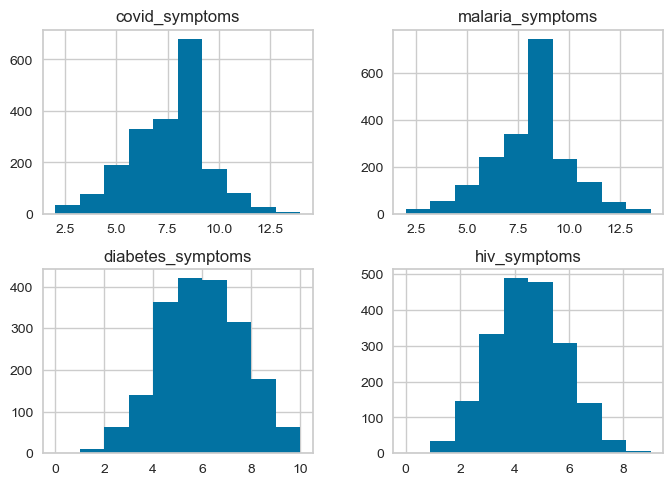

In [51]:
malaria_data[['covid_symptoms','malaria_symptoms','diabetes_symptoms','hiv_symptoms']].hist();

Checking the distribution of the target in the malaria sub-dataset

<AxesSubplot:>

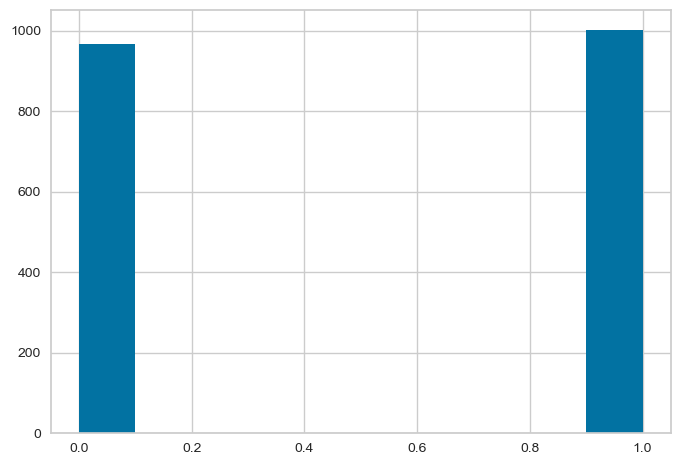

In [52]:
malaria_data['Label'].hist()

Further subsetting to select out only instances where the malaria_symptoms have a higher value than the other symptoms.

In [53]:
trim = malaria_data[malaria_data['malaria_symptoms']> malaria_data['covid_symptoms']]
trim = trim[trim['malaria_symptoms']> trim['hiv_symptoms']]
trim = trim[trim['malaria_symptoms']> trim['diabetes_symptoms']]
trim.head()

PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height  \
16      99072   32  Female             Others     Others     102     174   
25      45634   99  Female         Homosexual      Asian      94     187   
34      32167   91  Female            Asexual     Others     108     180   
37      30627   63    Male           Bisexual  Caucasian      41     198   
47        425   52    Male         Homosexual      Asian     111     159   

            BMI  Label  Fever  ...  DryMouth  TinglingInHandsOrFeet  RedEye  \
16        Obese      0      1  ...         1                      1       0   
25   Overweight      0      0  ...         0                      0       1   
34        Obese      1      0  ...         1                      0       0   
37  Underweight      0      0  ...         1                      0       0   
47        Obese      1      1  ...         1                      1       0   

    LossOfConsciousness  Disease  covid_symptoms  malaria_symptoms  \
16                    0  Malaria              12                13   
25                    1  Malaria               7                 9   
34                    0  Malaria               7                 9   
37                    0  Malaria               7                 8   
47                    1  Malaria               6                 8   

    diabetes_symptoms  hiv_symptoms  total_symptoms  
16                  8             6              39  
25                  3             4              23  
34                  6             6              28  
37                  6             3              24  
47                  7             5              26  

[5 rows x 66 columns]

Plotting the target distribution in the subset

<AxesSubplot:>

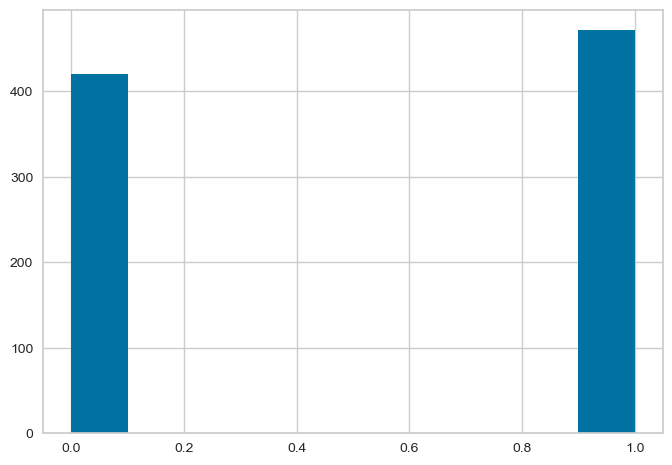

In [54]:
trim['Label'].hist()

Trying out model spot checking within the Malaria subset

In [55]:
s = ClassificationExperiment()
s.setup(trim, target = 'Label', session_id = 123, normalize = True, feature_selection = True)

In [56]:
best = s.compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In the Malaria subset of the dataset, the dummy classifier and knn had better scores, however, non seemed superior for further training.

### Principal Component Analysis
As none of the models spot-checked was superior than guesses, principal component analysis was done to check its importance in model selection.

In [57]:
# Splitting the wrangled and category encoded dataset
X , y = fine_data_dummies.drop(['Label','PatientID'], axis = 1), fine_data_dummies['Label']

The first two principal components of the data were selected.

In [58]:
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X)
# transform data onto the first two principal components
X_pca = pca.transform(X)

In [59]:
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (10000, 80)
Reduced shape: (10000, 2)


#### Checking the correlation between the two chosen principal components with a hue on Label

Text(0.5, 1.0, 'PCA of top 2 components hued by Label')

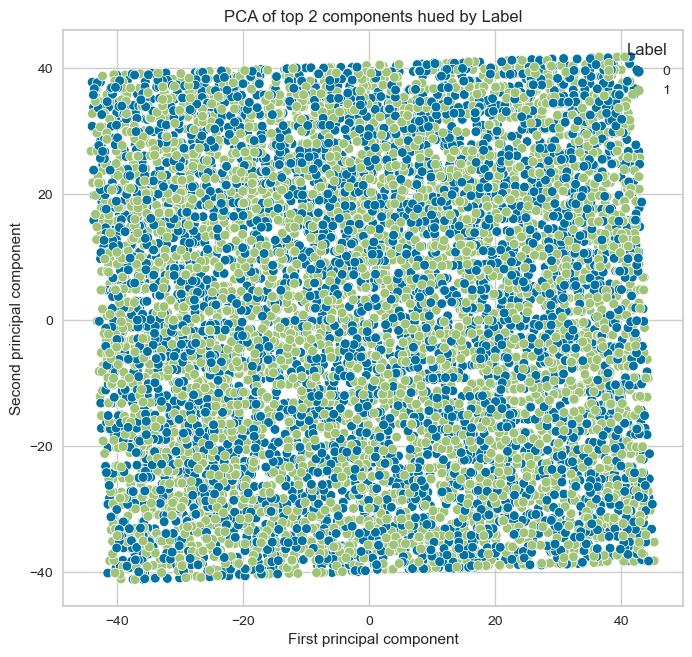

In [60]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x = X_pca[:, 0], y=  X_pca[:, 1], hue = fine_data_dummies.Label)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of top 2 components hued by Label")

Text(0, 0.5, 'Principal components')

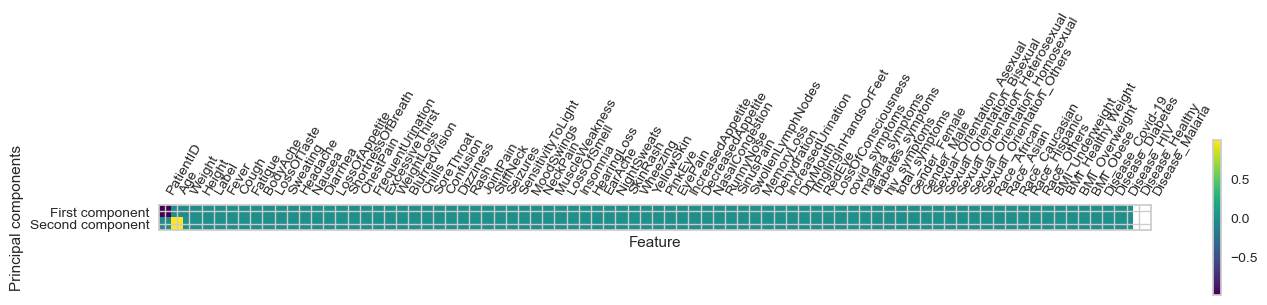

In [61]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(fine_data_dummies.columns)),fine_data_dummies.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Comments and To Do:
- To this point, no model has provided significant score for further building or training as none performed significantly better than a dummy classifier.
- There is need to do more data wrangling to understand the data better.
- There is need to do feature engineering to make the data suitable for machine learning.
- **We have not trained any model at this point**, however, we shall keep looking into the dataset for further understanding.